> ## **Métodos Computacionales II - Primer Parcial**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [10]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

In [8]:
def System(r, t):
    
    "Función que establece el sistema de ecuaciones diferenciales \
    a resolver. Editar para el caso de trabajar sistemas de n-dimensiones."
    
    x, y, z, vx, vy, vz = r
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -1.*vy*np.sin(0.3*t)
    dvydt = 1.*vx*np.sin(0.3*t)
    dvzdt = 0
    
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

In [57]:
def RungeKutta_Fourth(f, r0, t):
    step = t[1] - t[0]
    
    #Asignación de la muestra de puntos y sus condiciones iniciales.
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]
    
    # Constantes del Método:
    
    K1 = np.zeros(6)
    K2 = np.zeros(6)
    K3 = np.zeros(6)
    K4 = np.zeros(6)
    
    # Pendientes instantáneas:
    
    R = np.zeros(6)
    
    for i in range(1, len(t)):
        # Búsqueda de las constantes:
            
        R = np.array([x[i-1], y[i-1], z[i-1], vx[i-1], vy[i-1], vz[i-1]])
        K1 = f(R, t[i - 1])
        
        R = np.array([x[i-1] + 0.5*step*K1[0], y[i-1] + 0.5*step*K1[1], z[i-1] + 0.5*step*K1[2], 
                      vx[i-1] + 0.5*step*K1[3], vy[i-1] + 0.5*step*K1[4], vz[i-1] + 0.5*step*K1[5]])
        K2 = f(R, t[i-1] + 0.5*h)
        
        R = np.array([x[i-1] + 0.5*step*K2[0], y[i-1] + 0.5*step*K2[1], z[i-1] + 0.5*step*K2[2], 
                      vx[i-1] + 0.5*step*K2[3], vy[i-1] + 0.5*step*K2[4], vz[i-1] + 0.5*step*K2[5]])
        K3 = f(R, t[i-1] + 0.5*h)
        
        R = np.array([x[i-1] + step*K3[0], y[i-1] + step*K3[1], z[i-1] + step*K3[2], 
                      vx[i-1] + step*K3[3], vy[i-1] + step*K3[4], vz[i-1] + step*K3[5]])
        K4 = f(R, t[i-1] + h)
        
        # Volor del paso posterior:
        
        x[i] = x[i-1] + (1/6)*step*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        y[i] = y[i-1] + (1/6)*step*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1])
        z[i] = z[i-1] + (1/6)*step*(K1[2] + 2*K2[2] + 2*K3[2] + K4[2])
        
        vx[i] = vx[i-1] + (1/6)*step*(K1[3] + 2*K2[3] + 2*K3[3] + K4[3])
        vy[i] = vy[i-1] + (1/6)*step*(K1[4] + 2*K2[4] + 2*K3[4] + K4[4])
        vz[i] = vz[i-1] + (1/6)*step*(K1[5] + 2*K2[5] + 2*K3[5] + K4[5])
        
    return x, y, z, vx, vy, vz
        

In [60]:
#h = 0.01
t = np.linspace(0,20,100)
r0 = [0., 0., 0., 0., 1., 1.]
r = integrate.odeint(System, r0, t)
x, y, z, vx, vy, vz = RungeKutta_Fourth(System, r0, t)

<IPython.core.display.Javascript object>


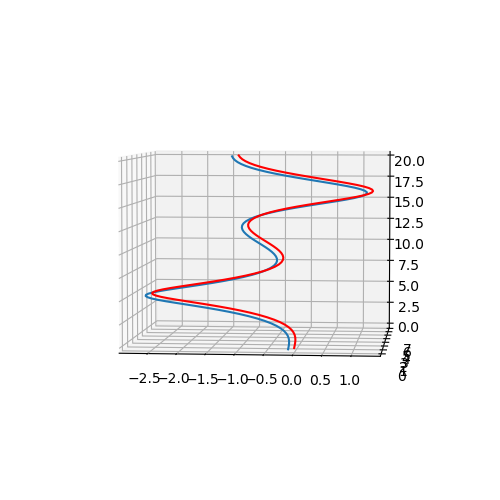

In [62]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = "3d")
ax.plot(r[:,0] - 0.1, r[:,1]- 0.1, r[:,2]- 0.1)
ax.plot(x, y, z, color = "red")